## Phase 4.39

#  Natural Language Processing

## Objectives
- <a href='#intro'>Introduce</a> Natural Language Processing.
- Look at some of the common <a href='#preprocessing'>Preprocessing Techniques</a>.
- Look at two ways to <a href='#engineering'>represent text</a> data in a DataFrame.


- <a href='#modeling'>Practice</a> using these processing skills and train several Bayes models.

<a id='intro'></a>
# NLP: Intro
> *Analytics tasks that deal with natural human language, in the form of text or speech.*

- Language Processing is used to allow computers to interact with text data (`string` data).
- Since *strings*' meanings are not interpreted by computers, we need to process our data in a way that is understandable.

<img src='./images/word_math.png'>

- *In order to understand these word-relationships, a computer will need accurate vector-representations of each word.*


- *Other common methods of text analysis include **bag of words**, **term frequency-inverse document frequency** (TF-IDF), **word embedding**,  **sequence modeling**.*


## Where is NLP Used?
- Customer reviews (*Sentiment Analysis*)
- AI Assistants / Chatbots
- Voice-to-Text
- Spam Detection

## Overview

<img src='./images/overview_nlp.png' width=600>

In [1]:
import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/claudefried/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/claudefried/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/claudefried/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
plt.style.use('seaborn-talk')

<a id='preprocessing'></a>
# Preprocessing

In [4]:
REVIEW = '''From the beginning of the movie, it gives the feeling the director 
is trying to portray something, what I mean to say that instead of the story 
dictating the style in which the movie should be made, he has gone in the 
opposite way, he had a type of move that he wanted to make, and wrote a story 
to suite it. And he has failed in it very badly. I guess he was trying to make 
a stylish movie. Any way I think this movie is a total waste of time and effort. 
In the credit of the director, he knows the media that he is working with, what 
I am trying to say is I have seen worst movies than this. Here at least the 
director knows to maintain the continuity in the movie. And the actors also have 
given a decent performance.'''

In [5]:
REVIEW

'From the beginning of the movie, it gives the feeling the director \nis trying to portray something, what I mean to say that instead of the story \ndictating the style in which the movie should be made, he has gone in the \nopposite way, he had a type of move that he wanted to make, and wrote a story \nto suite it. And he has failed in it very badly. I guess he was trying to make \na stylish movie. Any way I think this movie is a total waste of time and effort. \nIn the credit of the director, he knows the media that he is working with, what \nI am trying to say is I have seen worst movies than this. Here at least the \ndirector knows to maintain the continuity in the movie. And the actors also have \ngiven a decent performance.'

## Tokenization

- Tokenization is the process of splitting documents into units of observations. 
- We usually represent the tokens as **$n$-gram**, where n represents the consecutive words occurring in a document. 
- Most often, tokenization is a **unigram** representation ($n = 1$)

> *Ex:*
> ```python
> s = 'George lives here'
> 
> # 1
> ['George', 'lives', 'here']
> 
> # 2
> ['George lives', 'lives here']
> 
> # 3
> ['George lives here']
> ```

In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

In [7]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
tokenized_review = tokenizer.tokenize(REVIEW)

tokenized_review[:5]

['From', 'the', 'beginning', 'of', 'the']

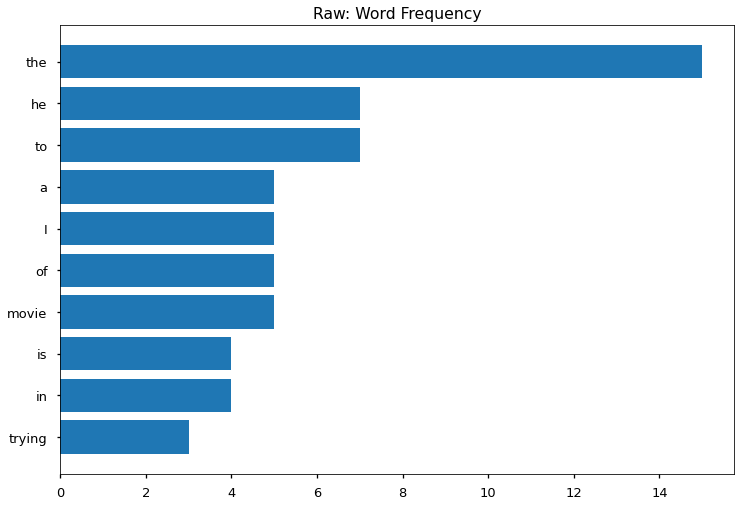

In [8]:
freq_df = pd.DataFrame(
    FreqDist(tokenized_review).items(),
    columns=['word', 'frequency'])
freq_df.sort_values('frequency', inplace=True)

fig, ax = plt.subplots()
ax.barh(freq_df['word'].tail(10), freq_df['frequency'].tail(10))
ax.set(title='Raw: Word Frequency')
fig.tight_layout()

***Nobody cares about that graph.***

## Stopwords

- Stopwords are a set of commonly used words `(it, the, is, a, an ...)` which do not add much or any substance to the sentence (semantically meaningless).

In [9]:
from nltk.corpus import stopwords

In [10]:
stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [11]:
# Creating a set for lookup efficiency
stopwords_set = set(stopwords.words('english'))

filtered_review = list(filter(lambda x: x.lower() not in stopwords_set, tokenized_review))
print('Tokenized:', len(tokenized_review))
print('Filtered:', len(filtered_review))

Tokenized: 145
Filtered: 61


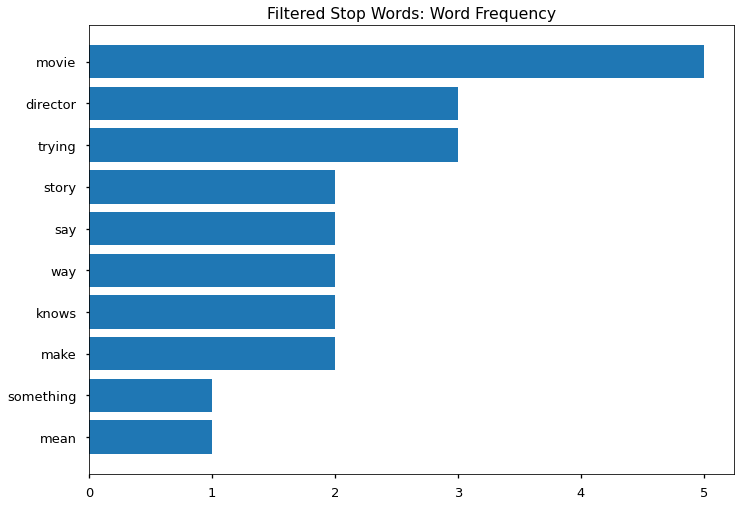

In [12]:
freq_df = pd.DataFrame(
    FreqDist(filtered_review).items(),
    columns=['word', 'frequency'])
freq_df.sort_values('frequency', inplace=True)

fig, ax = plt.subplots()
ax.barh(freq_df['word'].tail(10), freq_df['frequency'].tail(10))
ax.set(title='Filtered Stop Words: Word Frequency')
fig.tight_layout()

## Noise in Text Data
Like all other data, text data can be filled with noise. Some if the noise comes from typos, character encoding, urls, etc. However, some noise is a part of language as we know it. 
> *For example, `collect, collection, collected, collecting` are all considered completely independent words even though we know they are related.*

There are ways to deal with this latter type of noise. Below we will look at two very popular methods.


### Stemming
Stemming is a process used in order to identify the "stem" of the word and therefore bin words together.

*Stems* are created by removing the suffixes or prefixes used with a word.

<img src='./images/stemming.png' width=300>

In [13]:
from nltk.stem import PorterStemmer

In [14]:
stemmer = PorterStemmer()

In [15]:
# Define function to print pretty.
def format_string(s1, s2, length=25, character='-'):
    """
    Return a combination of two strings to be a given length 
    separated by a given character.
    """
    
    num_given_characters = len(s1) + len(s2)
    if num_given_characters > length:
        return f'{s1} {s2}'
    
    middle = character * (length - num_given_characters - 2)
    return f'{s1} {middle} {s2}'

In [16]:
# Show stemming process.
print(format_string('ORIGINAL', 'STEM'))
print(format_string('', '', character='*'))

for word in filtered_review:
    stemmed_word = stemmer.stem(word)
    if stemmed_word != word:
        print(format_string(word, stemmed_word))

ORIGINAL ----------- STEM
 *********************** 
beginning --------- begin
movie -------------- movi
gives -------------- give
feeling ------------ feel
trying -------------- tri
something -------- someth
story ------------- stori
dictating -------- dictat
movie -------------- movi
opposite -------- opposit
wanted ------------- want
story ------------- stori
suite -------------- suit
failed ------------- fail
badly ------------- badli
trying -------------- tri
movie -------------- movi
movie -------------- movi
waste -------------- wast
knows -------------- know
working ------------ work
trying -------------- tri
movies ------------- movi
knows -------------- know
continuity ------ continu
movie -------------- movi
actors ------------ actor
performance ----- perform


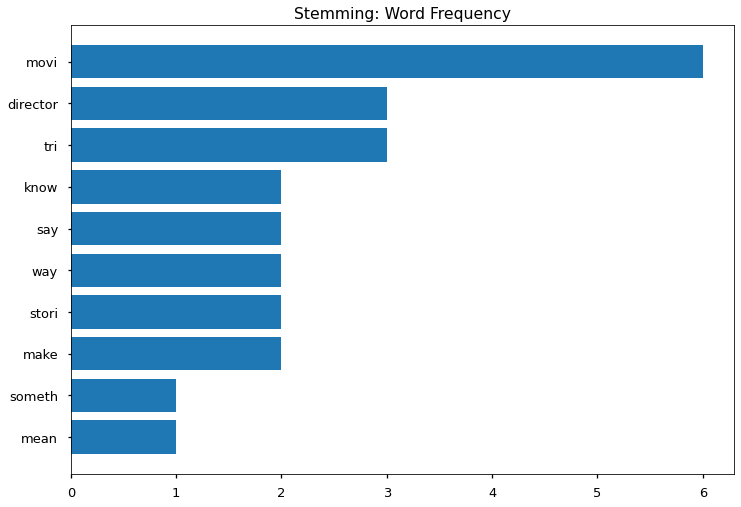

In [17]:
# Plot stemmed word frequency.
stemmed_review = [stemmer.stem(w) for w in filtered_review]

freq_df = pd.DataFrame(
    FreqDist(stemmed_review).items(),
    columns=['word', 'frequency'])
freq_df.sort_values('frequency', inplace=True)

fig, ax = plt.subplots()
ax.barh(freq_df['word'].tail(10), freq_df['frequency'].tail(10))
ax.set(title='Stemming: Word Frequency')
fig.tight_layout()

### Lemmatization

Lemmatizing is a very similar process to *Stemming* besides a key difference: it returns actual words. It is a more involved (smarter) process. 
- In Lemmatization, the root word is called Lemma.
- *A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.*

<img src='./images/lemmatization.png' width=300>

In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
lemmatizer = WordNetLemmatizer()

In [20]:
# Show lemmatizing process.
print(format_string('ORIGINAL', 'LEMMATIZATION'))
print(format_string('', '', character='*'))

for word in filtered_review:
    lemmatized_word = lemmatizer.lemmatize(word)
    if lemmatized_word != word:
        print(format_string(word, lemmatized_word))

ORIGINAL -- LEMMATIZATION
 *********************** 
gives -------------- give
knows -------------- know
media ------------ medium
movies ------------ movie
knows -------------- know
actors ------------ actor


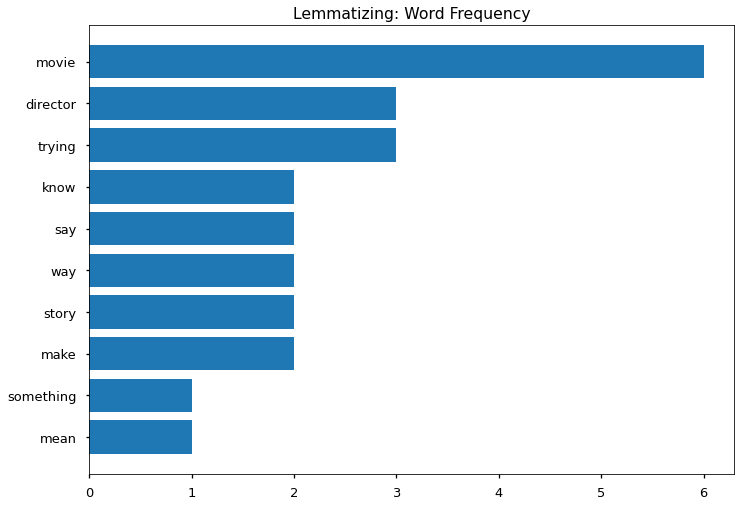

In [21]:
# Plot lemmatized word frequency.
lemmatized_review = [lemmatizer.lemmatize(w) for w in filtered_review]

freq_df = pd.DataFrame(
    FreqDist(lemmatized_review).items(),
    columns=['word', 'frequency'])
freq_df.sort_values('frequency', inplace=True)

fig, ax = plt.subplots()
ax.barh(freq_df['word'].tail(10), freq_df['frequency'].tail(10))
ax.set(title='Lemmatizing: Word Frequency')
fig.tight_layout()

In [22]:
lemmatized_review

['beginning',
 'movie',
 'give',
 'feeling',
 'director',
 'trying',
 'portray',
 'something',
 'mean',
 'say',
 'instead',
 'story',
 'dictating',
 'style',
 'movie',
 'made',
 'gone',
 'opposite',
 'way',
 'type',
 'move',
 'wanted',
 'make',
 'wrote',
 'story',
 'suite',
 'failed',
 'badly',
 'guess',
 'trying',
 'make',
 'stylish',
 'movie',
 'way',
 'think',
 'movie',
 'total',
 'waste',
 'time',
 'effort',
 'credit',
 'director',
 'know',
 'medium',
 'working',
 'trying',
 'say',
 'seen',
 'worst',
 'movie',
 'least',
 'director',
 'know',
 'maintain',
 'continuity',
 'movie',
 'actor',
 'also',
 'given',
 'decent',
 'performance']

<a id='engineering'></a>
# Feature Engineering

## Bag of Words

***To review***, a bag-of-words (BoW) is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a **bag** of words because **any information about the order or structure of words in the document is discarded**. The model is only concerned with whether known words occur in the document, not where in the document.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# The CountVectorizer takes in strings.
# Since we've already processed the strings into tokens, we have to reverse that.
review_lst = [' '.join(r) for r in 
              [filtered_review, stemmed_review, lemmatized_review]]
review_lst[0]

'beginning movie gives feeling director trying portray something mean say instead story dictating style movie made gone opposite way type move wanted make wrote story suite failed badly guess trying make stylish movie way think movie total waste time effort credit director knows media working trying say seen worst movies least director knows maintain continuity movie actors also given decent performance'

In [25]:
review_lst[1]

'begin movi give feel director tri portray someth mean say instead stori dictat style movi made gone opposit way type move want make wrote stori suit fail badli guess tri make stylish movi way think movi total wast time effort credit director know media work tri say seen worst movi least director know maintain continu movi actor also given decent perform'

In [26]:
review_lst[2]

'beginning movie give feeling director trying portray something mean say instead story dictating style movie made gone opposite way type move wanted make wrote story suite failed badly guess trying make stylish movie way think movie total waste time effort credit director know medium working trying say seen worst movie least director know maintain continuity movie actor also given decent performance'

In [27]:
# We've seen this before...
vec = CountVectorizer(stop_words=None)
vectorized_review = vec.fit_transform(review_lst)

pd.DataFrame(vectorized_review.toarray(), columns=vec.get_feature_names())

,actor,actors,also,badli,badly,begin,beginning,continu,continuity,credit,...,type,want,wanted,wast,waste,way,work,working,worst,wrote
0,0,1,1,0,1,0,1,0,1,1,...,1,0,1,0,1,2,0,1,1,1
1,1,0,1,1,0,1,0,1,0,1,...,1,1,0,1,0,2,1,0,1,1
2,1,0,1,0,1,0,1,0,1,1,...,1,0,1,0,1,2,0,1,1,1


In [28]:
# Functionalize BoW.
def make_bag_of_words_dfs(text_train, text_test, vec=None):
    """Returns a tuple (X_train_df, X_test_df) of DataFrames."""
    
    if not vec:
        vec = CountVectorizer(stop_words='english')
    train_processed = vec.fit_transform(text_train)
    test_processed = vec.transform(text_test)
    
    return (
        pd.DataFrame(train_processed.todense(), 
                     columns=vec.get_feature_names()),
        pd.DataFrame(test_processed.todense(),
                     columns=vec.get_feature_names())
    )

## TF-IDF

TF-IDF normalizes the raw count of the document term matrix and represents **how important a word is in the given document.**

- **TF** (Term Frequency) is simply the frequency of words in a document.

$$ \large \text{TF}(t) = \frac{\text{number of times} (t) \text{appears in a document}}{\text{total number of terms in the document}} $$

- **IDF** (inverse document frequency) represents the measure of how much information the word provides. 
    - If a word is common or rare across all documents. 
    - Calculated as the **logarithmically scaled inverse fraction** of the **documents that contain the word** (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$ \large \text{idf}(w) = \log(\frac{\text{number of documents}}{\text{number of documents containing} (w)} ) $$

***

TF-IDF is the product: $$ \text{TF} \times \text{IDF}$$

In [29]:
from sklearn.datasets import fetch_20newsgroups

In [30]:
# Download dataset.
categories = [
    'alt.atheism', 
    'comp.windows.x', 
    'rec.sport.hockey', 
    'sci.crypt', 
    'talk.politics.guns'
]

newsgroups_train = fetch_20newsgroups(
    subset='train', 
    categories=categories, 
    remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(
    subset='test', 
    categories=categories, 
    remove=('headers', 'footers', 'quotes'))

X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

In [31]:
len(X_train)

2814

In [32]:
pd.Series(y_train).value_counts(normalize=True)

2    0.213220
3    0.211443
1    0.210732
4    0.194030
0    0.170576
dtype: float64

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer()

X_train_processed = tfidf.fit_transform(X_train)
X_test_processed = tfidf.transform(X_test)

In [35]:
X_train_processed

<2814x36622 sparse matrix of type '<class 'numpy.float64'>'
	with 301887 stored elements in Compressed Sparse Row format>

In [36]:
pd.DataFrame(
    X_train_processed.todense(), 
    columns=tfidf.get_feature_names()
    ).head()

,00,000,0000,00000000,00000000b,00000001,00000001b,00000010,00000010b,00000011,...,zxp,zxqi,zy,zyg,zysv,zz,zz_g9q3,zzcrm,zzi776,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Functionalize TF-IDF
def make_tfidf_dfs(text_train, text_test, tfidf=None):
    """Returns a tuple (X_train_df, X_test_df) of DataFrames."""
    
    if not tfidf:
        tfidf = TfidfVectorizer(stop_words='english')
    
    train_processed = tfidf.fit_transform(text_train)
    test_processed = tfidf.transform(text_test)
    
    return (
        pd.DataFrame(train_processed.todense(), 
                     columns=tfidf.get_feature_names()),
        pd.DataFrame(test_processed.todense(),
                     columns=tfidf.get_feature_names())
    )

<a id='modeling'></a>
# Modeling

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [39]:
def train_bayes(bow_data, tfidf_data):
    """Prints the accuracy score on train and test data."""
    
    data = (
        ('BoW', bow_data),
        ('TF-IDF', tfidf_data)
    )

    for name, (train, test) in data:
        clf = MultinomialNB()
        clf.fit(train, y_train)
        print(name)
        print(f'\tTrain\n\t{accuracy_score(y_train, clf.predict(train))}')
        print(f'\tTest\n\t{accuracy_score(y_test, clf.predict(test))}\n\n')

## Preprocessing I: Lowercase & Stopword-Filter

In [40]:
import string

In [41]:
# Lower case & stopword/punctuation filter.
def process_lowercase_stopwords_punctuation(text):
    """Returns a lowercase text with no stopwords or punctuation."""
    
    sw_set = set(stopwords.words('english'))
    punct = set(string.punctuation)
    text = ''.join([c for c in text.lower() if c not in punct])
    return ' '.join(list(filter(lambda w: w not in sw_set, text.split())))
    

process_lowercase_stopwords_punctuation(X_train[0])

'note trial updates summarized reports idaho statesman local nbc affiliate television station ktvb channel 7 randy weaverkevin harris trial update day 4 friday april 16 1993 fourth day trial synopsis defense attorney gerry spence crossexamined agent cooper repeated objections prosecutor ronald howen spence moved mistrial denied day marked caustic crossexamination deputy marshal larry cooper defense attorney gerry spence although spence explicitly stated one angle stategy must involve destroying credibility agent cooper cooper governments eyewitness death agent degan spence attacked coopers credibility pointing discrepancies coopers statements last september made court cooper conceded things compressed secondsits difficult remember went first cooper acknowledged carried 9mm colt commando submachine gun silenced barrel thought colt commando revolver cooper continued stating federal agents specific plans use weapon started kill weavers dog spence asked seven cartridges could fired degans 

In [42]:
X_train_processed_1 = [process_lowercase_stopwords_punctuation(e)
                       for e in X_train]
X_test_processed_1 = [process_lowercase_stopwords_punctuation(e)
                       for e in X_test]

In [43]:
bow_data = make_bag_of_words_dfs(X_train_processed_1, X_test_processed_1)
tfidf_data = make_tfidf_dfs(X_train_processed_1, X_test_processed_1)

In [44]:
train_bayes(bow_data, tfidf_data)

BoW
	Train
	0.9538024164889837
	Test
	0.8558462359850507


TF-IDF
	Train
	0.9665955934612651
	Test
	0.8435664709022958




## Preprocessing II.a: P(I) + Stemming

In [45]:
def stem_text(text, stemmer=None):
    """Return a stemmed version of the text."""
    
    if not stemmer:
        stemmer = PorterStemmer()
    
    return ' '.join([stemmer.stem(w) for w in text.split()])


stem_text(X_train_processed_1[0])

'note trial updat summar report idaho statesman local nbc affili televis station ktvb channel 7 randi weaverkevin harri trial updat day 4 friday april 16 1993 fourth day trial synopsi defens attorney gerri spenc crossexamin agent cooper repeat object prosecutor ronald howen spenc move mistrial deni day mark caustic crossexamin deputi marshal larri cooper defens attorney gerri spenc although spenc explicitli state one angl stategi must involv destroy credibl agent cooper cooper govern eyewit death agent degan spenc attack cooper credibl point discrep cooper statement last septemb made court cooper conced thing compress secondsit difficult rememb went first cooper acknowledg carri 9mm colt commando submachin gun silenc barrel thought colt commando revolv cooper continu state feder agent specif plan use weapon start kill weaver dog spenc ask seven cartridg could fire degan m16 rifl degan appar dead cooper could say sure degan return fire go spenc continu ask mani agent extent cooper discu

In [46]:
# Stemming.
X_train_processed_2a = [stem_text(e) for e in X_train_processed_1]
X_test_processed_2a = [stem_text(e) for e in X_test_processed_1]

In [47]:
bow_data_stemmed = make_bag_of_words_dfs(
    X_train_processed_2a, X_test_processed_2a)
tfidf_data_stemmed = make_tfidf_dfs(
    X_train_processed_2a, X_test_processed_2a)

In [48]:
train_bayes(bow_data_stemmed, tfidf_data_stemmed)

BoW
	Train
	0.9445628997867804
	Test
	0.8681260010678057


TF-IDF
	Train
	0.9570007107320541
	Test
	0.8457020822210358




## Preprocessing II.b: P(I) + Lemmatization

In [49]:
def lemmatize_text(text, lemmatizer=None):
    """Return a stemmed version of the text."""
    
    if not lemmatizer:
        lemmatizer = WordNetLemmatizer()
    
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split()])


lemmatize_text(X_train_processed_1[0])

'note trial update summarized report idaho statesman local nbc affiliate television station ktvb channel 7 randy weaverkevin harris trial update day 4 friday april 16 1993 fourth day trial synopsis defense attorney gerry spence crossexamined agent cooper repeated objection prosecutor ronald howen spence moved mistrial denied day marked caustic crossexamination deputy marshal larry cooper defense attorney gerry spence although spence explicitly stated one angle stategy must involve destroying credibility agent cooper cooper government eyewitness death agent degan spence attacked cooper credibility pointing discrepancy cooper statement last september made court cooper conceded thing compressed secondsits difficult remember went first cooper acknowledged carried 9mm colt commando submachine gun silenced barrel thought colt commando revolver cooper continued stating federal agent specific plan use weapon started kill weaver dog spence asked seven cartridge could fired degans m16 rifle dega

In [50]:
# Lemmatization.
X_train_processed_2b = [lemmatize_text(e) for e in X_train_processed_1]
X_test_processed_2b = [lemmatize_text(e) for e in X_test_processed_1]

In [51]:
bow_data_lemmatized = make_bag_of_words_dfs(
    X_train_processed_2b, X_test_processed_2b)
tfidf_data_lemmatized = make_tfidf_dfs(
    X_train_processed_2b, X_test_processed_2b)

In [52]:
train_bayes(bow_data_lemmatized, tfidf_data_lemmatized)

BoW
	Train
	0.9509594882729211
	Test
	0.8574479444741057


TF-IDF
	Train
	0.9609097370291401
	Test
	0.8467698878804057


